# **Random Forest**

In [83]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# 2. Cargar dataset
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')
# Ruta de tu archivo (ejemplo en "Mi unidad")
ruta = '/content/drive/My Drive/Colab Notebooks/Practicas ML/Practica 5 - ML/Dataset/Cancer.csv'
# Cargar con pandas
df = pd.read_csv(ruta)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


/tmp/ipython-input-2425888536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis_encoded", data=data, palette="viridis")
/tmp/ipython-input-2425888536.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x="diagnosis_encoded", data=data, palette="viridis")


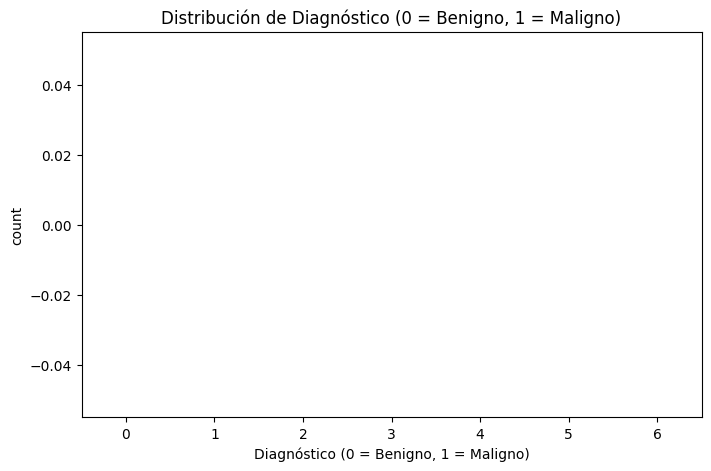

In [ ]:
# 3. Visualización inicial del dataset
plt.figure(figsize=(8,5))
# Map 'M' to 1 and 'B' to 0 for plotting
data['diagnosis_encoded'] = data['diagnosis'].map({'M': 1, 'B': 0})
sns.countplot(x="diagnosis_encoded", data=data, palette="viridis")
plt.title("Distribución de Diagnóstico (0 = Benigno, 1 = Maligno)")
plt.xlabel("Diagnóstico (0 = Benigno, 1 = Maligno)")
plt.show()

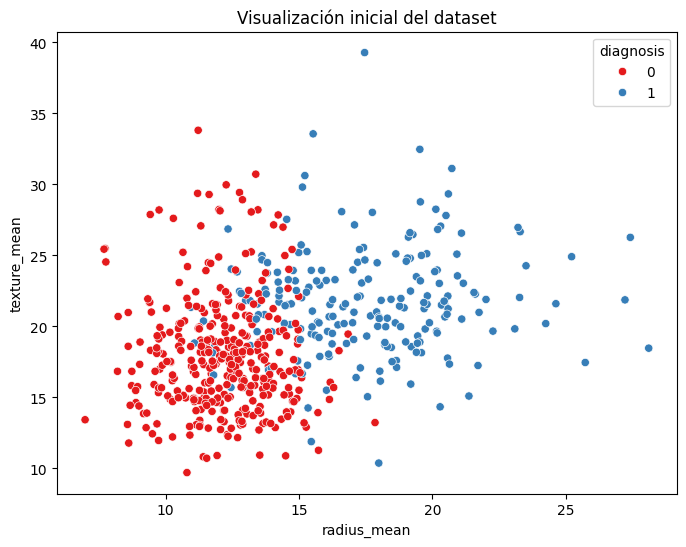

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="radius_mean", y="texture_mean", hue="diagnosis", palette="Set1")
plt.title("Visualización inicial del dataset")
plt.show()

In [ ]:
# 3. Preprocesamiento
# Codificar variable objetivo
df["diagnosis"] = LabelEncoder().fit_transform(data["diagnosis"])  # Malignant=1, Benign=0

# Drop the 'Unnamed: 32' column as it contains only NaNs
data = df.drop(columns=["Unnamed: 32"])

# Separar variables
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

# Manejo de valores faltantes (reemplazamos con la media de each columna)
X = X.fillna(X.mean())

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 5. Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

In [ ]:
# 6. Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de Clasificación:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de Clasificación:
Exactitud (Accuracy): 0.9561
Precisión: 1.0000
Sensibilidad (Recall): 0.8810
F1 Score: 0.9367


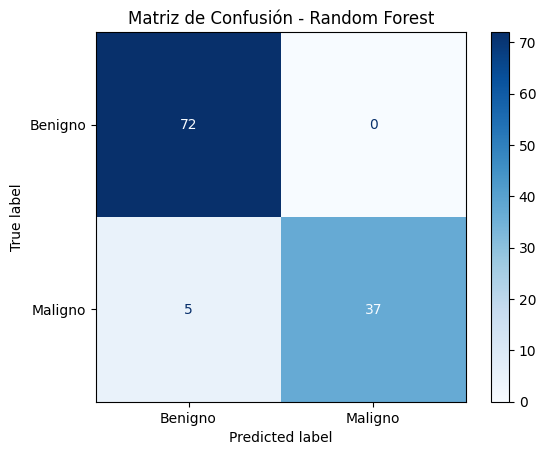

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

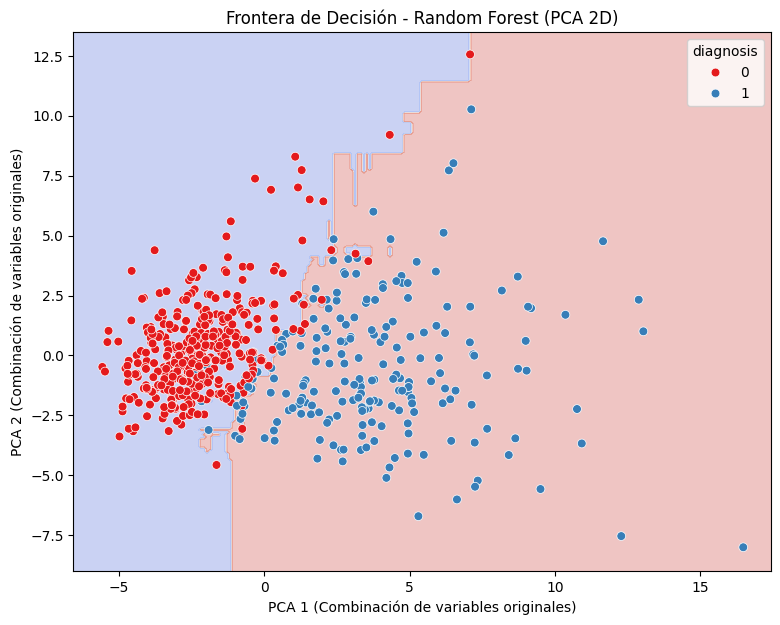

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = rf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)

plt.title("Frontera de Decisión - Random Forest (PCA 2D)")
plt.xlabel("PCA 1 (Combinación de variables originales)")
plt.ylabel("PCA 2 (Combinación de variables originales)")

plt.show()

# **AdaBoost Classifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

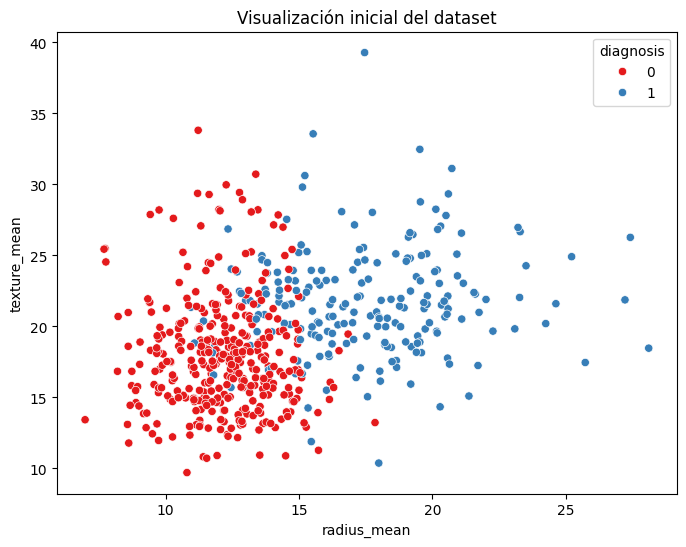

In [ ]:
# 2. Visualización inicial del dataset
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="radius_mean", y="texture_mean", hue="diagnosis", palette="Set1")
plt.title("Visualización inicial del dataset")
plt.show()

In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Modelo AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Predicciones
y_pred = ada.predict(X_test)

In [ ]:
# 6. Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de Clasificación (AdaBoost):")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de Clasificación (AdaBoost):
Exactitud (Accuracy): 0.9825
Precisión: 1.0000
Sensibilidad (Recall): 0.9524
F1 Score: 0.9756


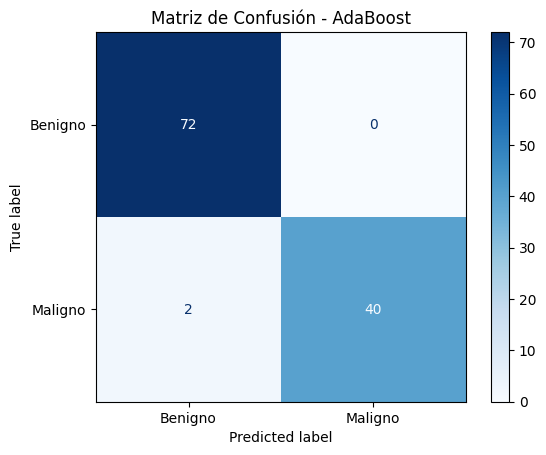

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - AdaBoost")
plt.show()

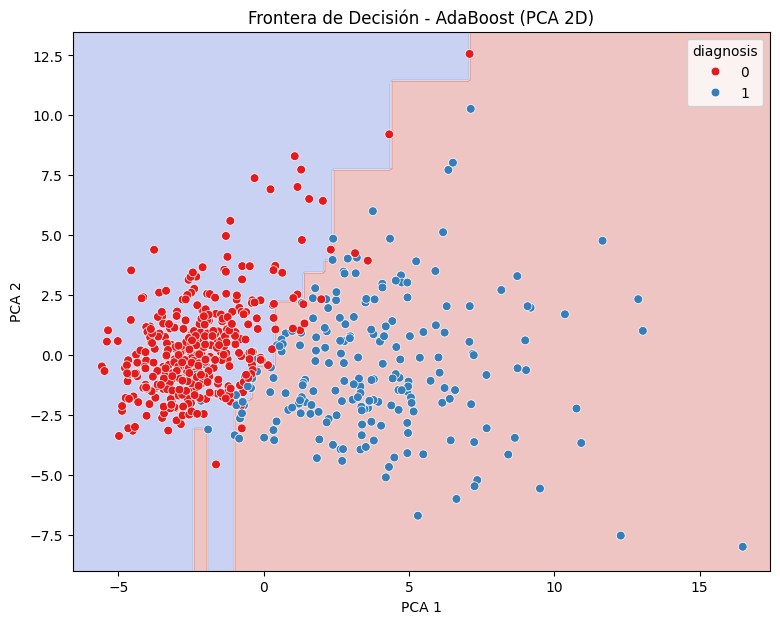

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

ada_pca = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = ada_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)
plt.title("Frontera de Decisión - AdaBoost (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# **GradientBoostingClassifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# 3. Preprocesamiento
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # Malignant=1, Benign=0

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Manejo de valores faltantes
X = X.fillna(X.mean())

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Modelo Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Predicciones
y_pred = gb.predict(X_test)

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# 6. Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de Clasificación (Gradient Boosting):")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Gradient Boosting")
plt.show()

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

gb_pca = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = gb_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)
plt.title("Frontera de Decisión - Gradient Boosting (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# **SVC**

In [ ]:
# 1) Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# 3. Preprocesamiento
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # Malignant=1, Benign=0
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Manejo de valores faltantes
X = X.fillna(X.mean())

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Modelo SVC
svc = SVC(kernel="rbf", probability=True, random_state=42)
svc.fit(X_train, y_train)

# Predicciones
y_pred = svc.predict(X_test)

In [ ]:
# 6. Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de Clasificación (SVC):")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - SVC")
plt.show()

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

svc_pca = SVC(kernel="rbf", probability=True, random_state=42)
svc_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = svc_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)
plt.title("Frontera de Decisión - SVC (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# **LinearSVC**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# 3. Preprocesamiento
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # Malignant=1, Benign=0

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Manejo de valores faltantes
X = X.fillna(X.mean())

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 5. Modelo LinearSVC
model = LinearSVC(max_iter=10000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de LinearSVC")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - LinearSVC")
plt.show()

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

svc_linear_pca = LinearSVC(max_iter=10000, random_state=42)
svc_linear_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = svc_linear_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)
plt.title("Frontera de Decisión - LinearSVC (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# **NuSVC**

In [ ]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# 3. Preprocesamiento
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # Malignant=1, Benign=0

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Manejo de valores faltantes
X = X.fillna(X.mean())

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Modelo NuSVC
nusvc = NuSVC(probability=True, random_state=42)
nusvc.fit(X_train, y_train)

# Predicciones
y_pred = nusvc.predict(X_test)

In [ ]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de NuSVC")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno (0)", "Maligno (1)"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - NuSVC")
plt.show()

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

nusvc_pca = NuSVC(probability=True, random_state=42)
nusvc_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = nusvc_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)
plt.title("Frontera de Decisión - NuSVC (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Agregar leyenda explícita para 0 y 1
plt.text(x_min+1, y_max-1,
         "Clases:\n0 = Benigno (no cáncer)\n1 = Maligno (cáncer)",
         fontsize=10, bbox=dict(facecolor="white", alpha=0.7))

plt.show()

# **KNN Classifier**

In [ ]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# 3. Preprocesamiento
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # Malignant=1, Benign=0

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Manejo de valores faltantes
X = X.fillna(X.mean())

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicciones
y_pred = knn.predict(X_test)

In [ ]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de KNeighborsClassifier")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno (0)", "Maligno (1)"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - KNN")
plt.show()

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)
plt.title("Frontera de Decisión - KNN (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Agregar leyenda explícita para 0 y 1
plt.text(x_min+1, y_max-1,
         "Clases:\n0 = Benigno (no cáncer)\n1 = Maligno (cáncer)",
         fontsize=10, bbox=dict(facecolor="white", alpha=0.7))
plt.show()

# **GaussianNB**

In [ ]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# 3. Preprocesamiento
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # Malignant=1, Benign=0

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Manejo de valores faltantes
X = X.fillna(X.mean())

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Modelo GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicciones
y_pred = gnb.predict(X_test)

In [ ]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de GaussianNB")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno (0)", "Maligno (1)"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - GaussianNB")
plt.show()

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = gnb_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)
plt.title("Frontera de Decisión - GaussianNB (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Agregar leyenda explícita para 0 y 1
plt.text(x_min+1, y_max-1,
         "Clases:\n0 = Benigno (no cáncer)\n1 = Maligno (cáncer)",
         fontsize=10, bbox=dict(facecolor="white", alpha=0.7))

plt.show()

# **DecisionTreeClassifier**

In [ ]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# 3. Preprocesamiento
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # Malignant=1, Benign=0

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Manejo de valores faltantes
X = X.fillna(X.mean())

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Modelo Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)  # puedes ajustar max_depth
dt.fit(X_train, y_train)

# Predicciones
y_pred = dt.predict(X_test)

In [ ]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de DecisionTreeClassifier")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno (0)", "Maligno (1)"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Decision Tree")
plt.show()

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

dt_pca = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = dt_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)
plt.title("Frontera de Decisión - Decision Tree (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Agregar leyenda explícita para 0 y 1
plt.text(x_min+1, y_max-1,
         "Clases:\n0 = Benigno (no cáncer)\n1 = Maligno (cáncer)",
         fontsize=10, bbox=dict(facecolor="white", alpha=0.7))

plt.show()

# **MLPClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
# 3. Preprocesamiento
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])  # Malignant=1, Benign=0

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Manejo de valores faltantes
X = X.fillna(X.mean())

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Modelo MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)

# Predicciones
y_pred = mlp.predict(X_test)

In [ ]:
# 6. Métricas
# ============================================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de MLPClassifier")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno (0)", "Maligno (1)"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - MLPClassifier")
plt.show()

In [ ]:
# 8. Frontera de decisión con PCA (reducción a 2D para visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

mlp_pca = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=2000, random_state=42)
mlp_pca.fit(X_train_pca, y_train_pca)

# Malla para graficar
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = mlp_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=40)
plt.title("Frontera de Decisión - MLPClassifier (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Agregar leyenda explícita para 0 y 1
plt.text(x_min+1, y_max-1,
         "Clases:\n0 = Benigno (no cáncer)\n1 = Maligno (cáncer)",
         fontsize=10, bbox=dict(facecolor="white", alpha=0.7))

plt.show()